In [1]:
import pickle
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load in X test sets
def load_inputs():
    X_test_color = pickle.load(open('E:/testing_color.pkl', "rb"))
    X_test_depth = pickle.load(open('E:/testing_depth.pkl', "rb"))
    X_test_icub_left = pickle.load(open('E:/testing_icub_left.pkl', "rb"))
    X_test_icub_right = pickle.load(open('E:/testing_icub_right.pkl', "rb"))
    return X_test_color, X_test_depth, X_test_icub_left, X_test_icub_right

# Function to load y values
def load_outputs():
    y_test = pickle.load(open('E:/y_testing.pkl', "rb"))
    return y_test

# Function to reshape data
def reshape_input_vect(vect, size=(128, 64, 3)):
    inp_vect = []
    for i in range(vect.shape[0]):
        inp_vect.append(np.reshape(vect[i], (128, 64, 3)))
    return np.asarray(inp_vect)

# Load in X data
X_test_color, X_test_depth, X_test_icub_left, X_test_icub_right = load_inputs()
print(X_test_color.shape, X_test_depth.shape, X_test_icub_left.shape, X_test_icub_right.shape)

# Load in y data
y_test = load_outputs()
print(y_test.shape)

# To categorical y-values [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
y_test = to_categorical(y_test, num_classes = None, dtype='float32')

(640, 24576) (640, 24576) (640, 24576) (640, 24576)
(640,)


In [3]:
# Reshape data
X_test_color, X_test_depth, X_test_icub_left, X_test_icub_right = reshape_input_vect(X_test_color), reshape_input_vect(X_test_depth), reshape_input_vect(X_test_icub_left), reshape_input_vect(X_test_icub_right)

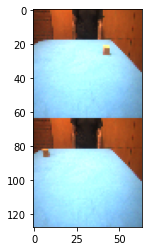

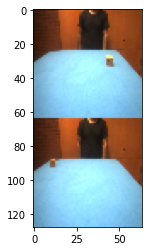

In [4]:
# Show first training image
plt.imshow(X_test_icub_left[0])
plt.show()
    
plt.imshow(X_test_icub_right[0])
plt.show()

In [5]:
# Import best performing models for ensemble learning

color_model = tf.keras.models.load_model('CNN_2_color_model')
depth_model = tf.keras.models.load_model('CNN_1_depth_model')
icub_left_model = tf.keras.models.load_model('CNN_2_icub_left_model')
icub_right_model = tf.keras.models.load_model('CNN_2_icub_right_model')

In [6]:
# Predicting the output on test set
pred_1 = color_model.predict(X_test_color)
pred_2 = depth_model.predict(X_test_depth)
pred_3 = icub_left_model.predict(X_test_icub_left)
pred_4 = icub_right_model.predict(X_test_icub_right)

20/20 [==============================] - 1s 26ms/step


In [9]:
pred_final = (pred_1 + pred_2 + pred_3 + pred_4) / 4

In [10]:
categories = ['Left to right', "Pull", "Push", "Right to left"]

y_pred = np.argmax(pred_final, axis=-1)

# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=-1)

# Print Classification report
print(classification_report(y_true, y_pred, target_names=categories, digits=4))

               precision    recall  f1-score   support

Left to right     0.9753    0.9875    0.9814       160
         Pull     0.9815    0.9938    0.9876       160
         Push     1.0000    0.9812    0.9905       160
Right to left     1.0000    0.9938    0.9969       160

     accuracy                         0.9891       640
    macro avg     0.9892    0.9891    0.9891       640
 weighted avg     0.9892    0.9891    0.9891       640



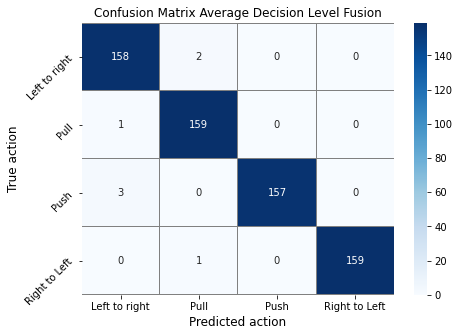

In [9]:
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred) 
# Plot the confusion matrix
categories = ['Left to right', "Pull", "Push", "Right to Left"]
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues", linecolor="grey", fmt= 'g',ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted action", fontsize=12)
plt.ylabel("True action", fontsize=12)
plt.title("Confusion Matrix Average Decision Level Fusion")
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)
plt.show()